In [1]:
import glob
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In this notebook I will be manipulating the data so that the ARIMA and Vector ARIMA model can produce optimal predictions.

In [2]:
#**IMPORTING DATA**
files=glob.glob('../../data/price_index_data/mod/*')

#getting the prices history from each index
data=[]
for file in files:
    data.append(pd.read_csv(file))

#converting the 'date' columns to datetime type
for i in data:
    i['date']=pd.to_datetime(i['date'])

#combining the data together
df=data[0]
for i in data[1:]:
    df=df.merge(i,on='date')

#removing the date column and setting it as the index
df.index=df['date']
df.drop(columns=['date'],inplace=True)

#removing unecessary columns
cols=[i for i in list(df.columns) if 'Unnamed' not in i]
df=df[cols]
df=df.dropna()

In [3]:
cols=[i for i in df.columns if 'close' in i]
df=df[cols]

From the data exploration, we inferred that the data wasn't stationary, but for the sake of be thorough, I will perform the Fuller test to confirm.

In [4]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [5]:
from statsmodels.tsa.stattools import adfuller
for column in df.columns:
    print(column)
    print(interpret_dftest(adfuller(df[column])))
    print()

bit_close
Test Statistic   -0.913431
p-value           0.783517
dtype: float64

nas_close
Test Statistic    0.616918
p-value           0.988025
dtype: float64

eth_close
Test Statistic    0.266126
p-value           0.975736
dtype: float64

dow_close
Test Statistic   -1.020676
p-value           0.745649
dtype: float64

ada_close
Test Statistic    0.382801
p-value           0.980840
dtype: float64

amd_close
Test Statistic    0.129558
p-value           0.968022
dtype: float64

snp_close
Test Statistic    0.078676
p-value           0.964575
dtype: float64

bnb_close
Test Statistic   -1.393449
p-value           0.585413
dtype: float64

nvda_close
Test Statistic    1.720120
p-value           0.998177
dtype: float64



None of the data is stationary so I will experiment with different transformations to make the data stationary.

In [6]:
for column in df.columns:
    print(column)
    print(interpret_dftest(adfuller(df[column].diff(1).dropna())))
    print()

bit_close
Test Statistic   -5.273314
p-value           0.000006
dtype: float64

nas_close
Test Statistic   -1.005277e+01
p-value           1.398357e-17
dtype: float64

eth_close
Test Statistic   -5.627021
p-value           0.000001
dtype: float64

dow_close
Test Statistic   -9.736263e+00
p-value           8.733775e-17
dtype: float64

ada_close
Test Statistic   -6.959652e+00
p-value           9.234817e-10
dtype: float64

amd_close
Test Statistic   -1.823689e+01
p-value           2.359995e-30
dtype: float64

snp_close
Test Statistic   -9.754960e+00
p-value           7.834088e-17
dtype: float64

bnb_close
Test Statistic   -5.014212
p-value           0.000021
dtype: float64

nvda_close
Test Statistic   -21.471493
p-value            0.000000
dtype: float64



Daily price changes seem to stationary. I graph the changes down below to get a sense of the data.

<Figure size 1152x576 with 0 Axes>

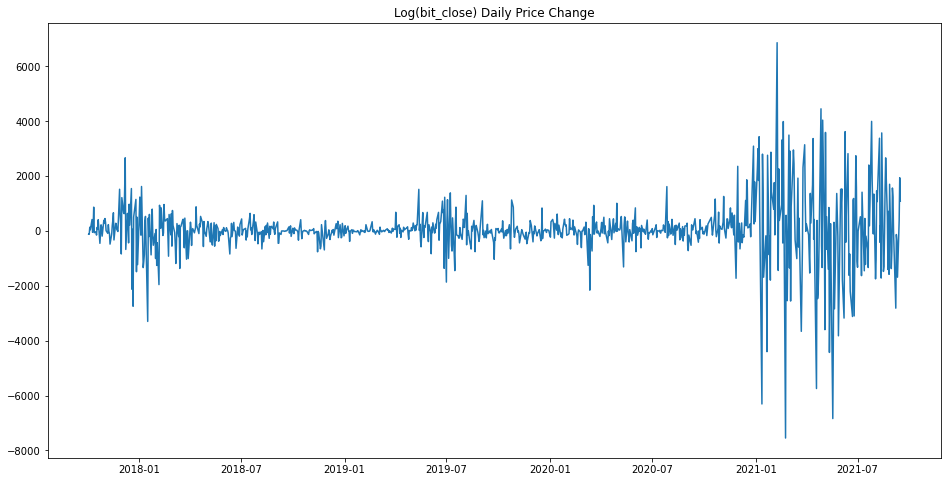

<Figure size 1152x576 with 0 Axes>

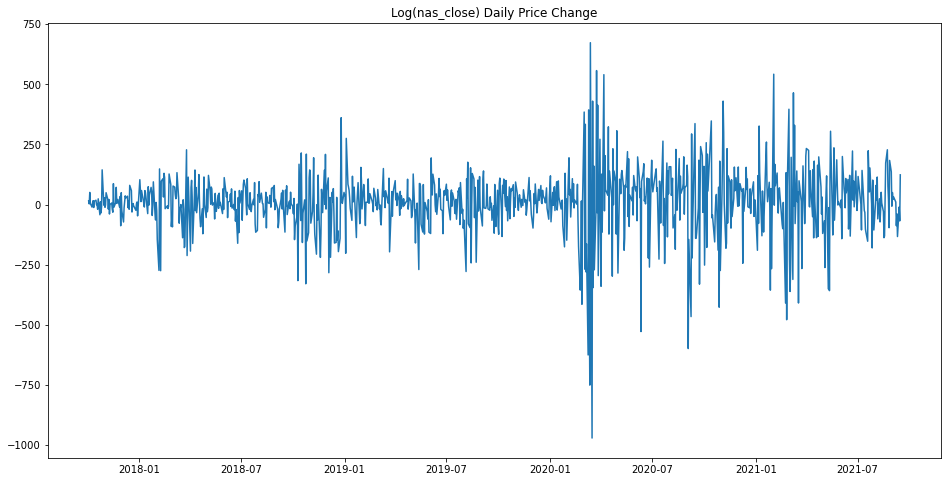

<Figure size 1152x576 with 0 Axes>

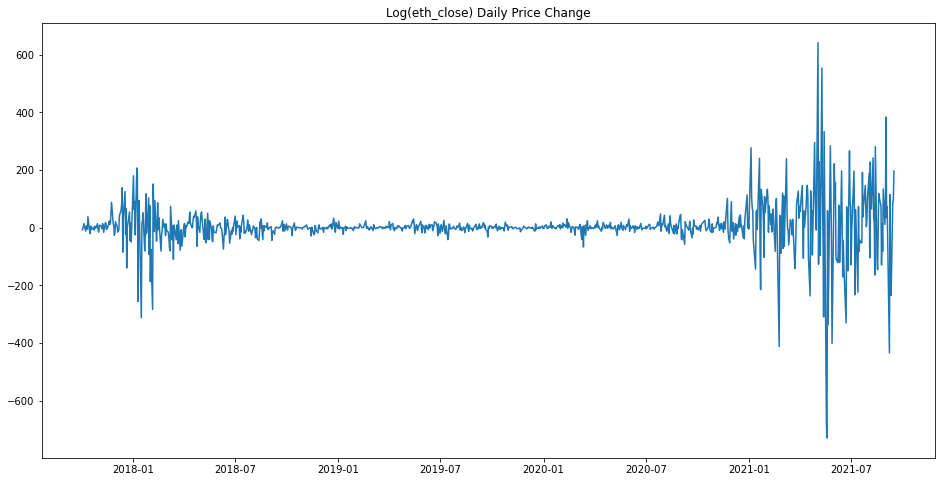

<Figure size 1152x576 with 0 Axes>

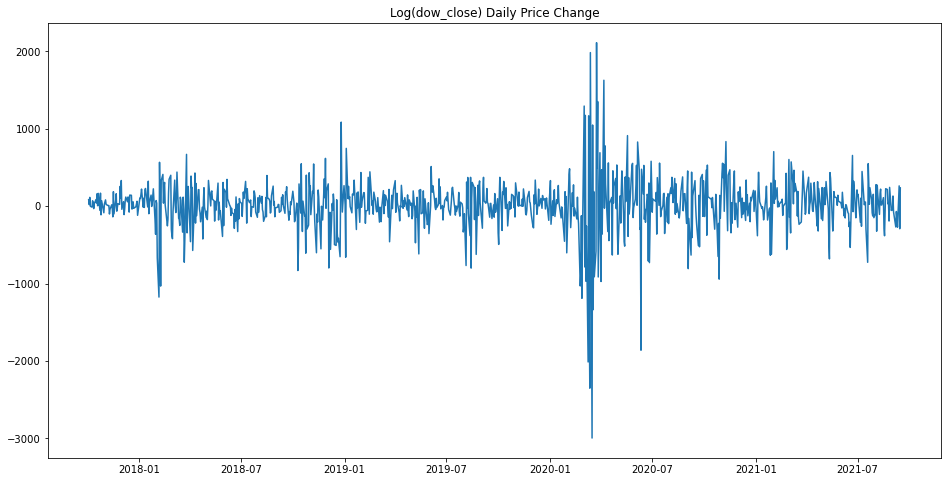

<Figure size 1152x576 with 0 Axes>

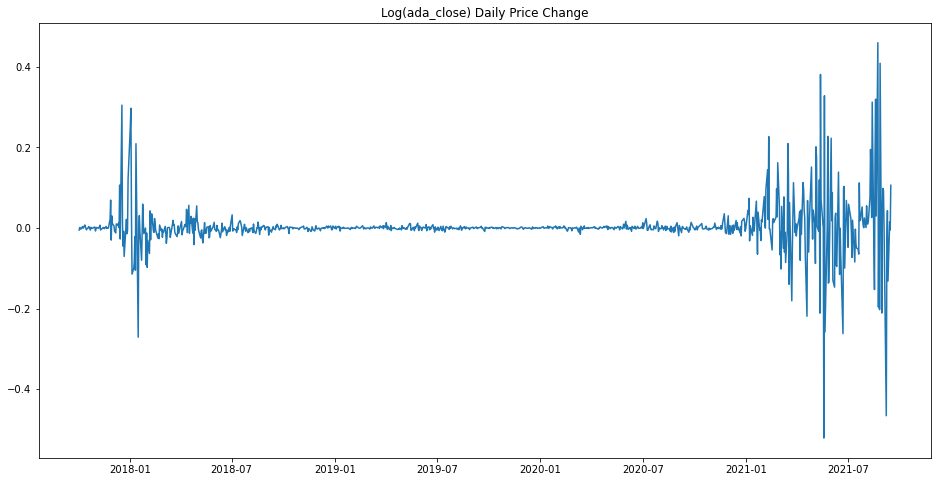

<Figure size 1152x576 with 0 Axes>

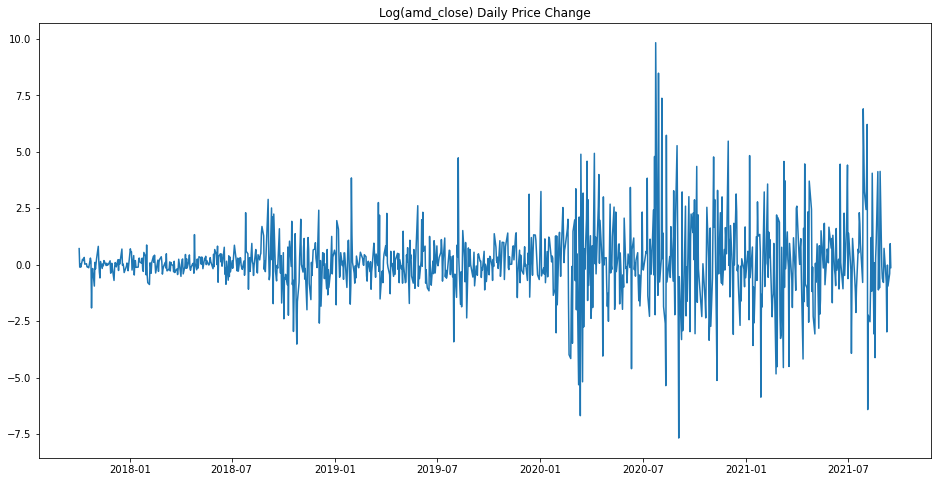

<Figure size 1152x576 with 0 Axes>

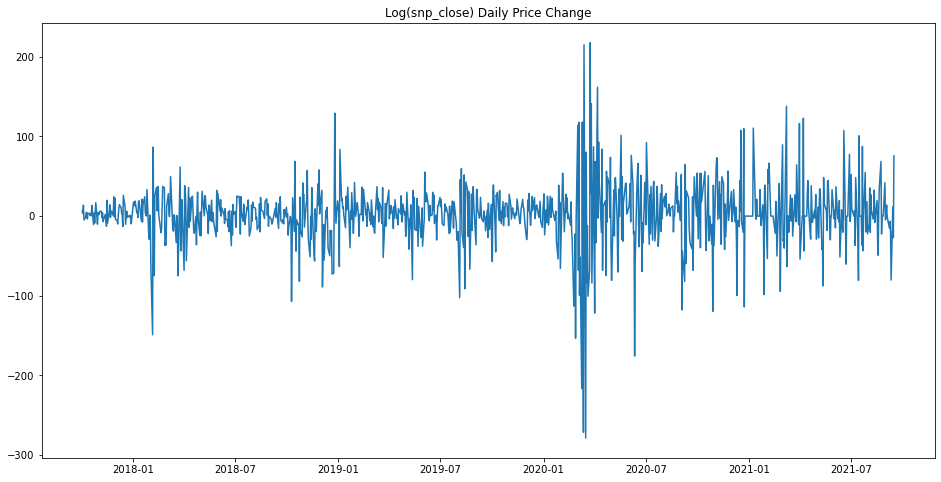

<Figure size 1152x576 with 0 Axes>

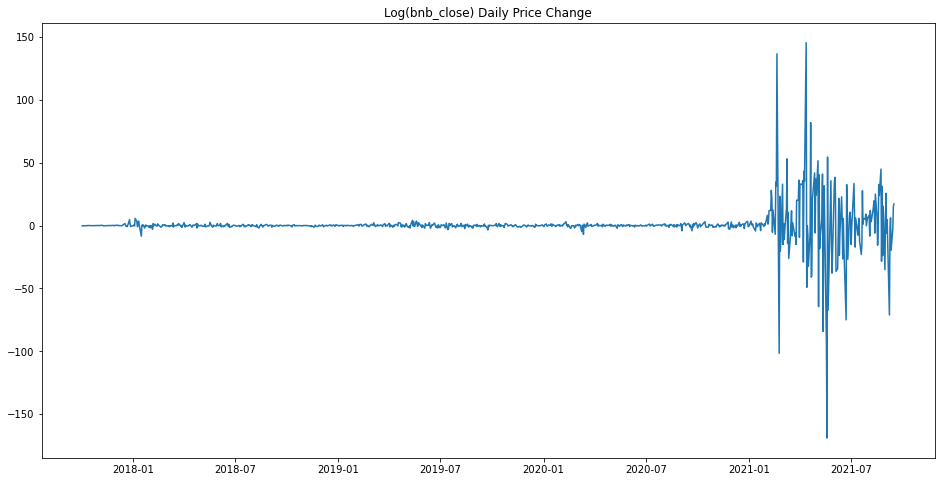

<Figure size 1152x576 with 0 Axes>

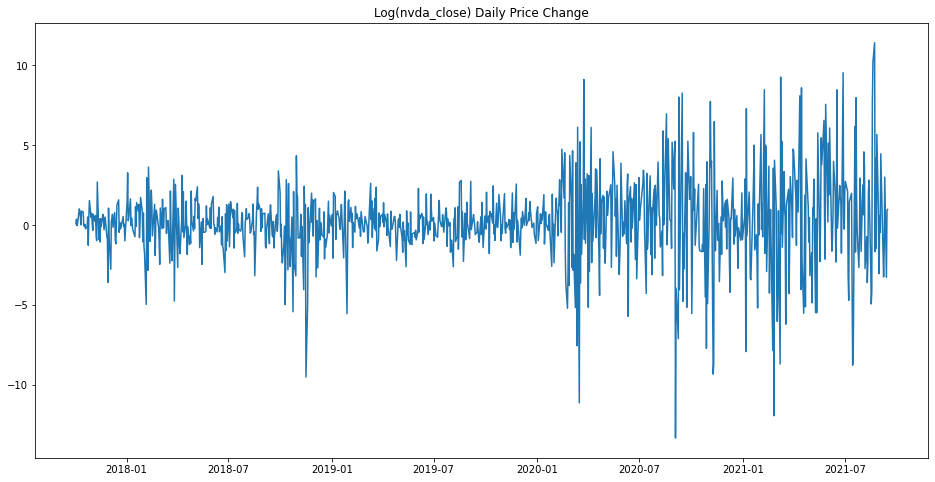

In [7]:
for column in df.columns:
    plt.figure(figsize=(16,8))
    plt.figure(figsize=(16,8))
    plt.plot((df[column]).diff(1))
    plt.title(f'Log({column}) Daily Price Change')
    plt.show()

The data doesn't have constant variance so I will find the daily log transformed price changes.

<Figure size 1152x576 with 0 Axes>

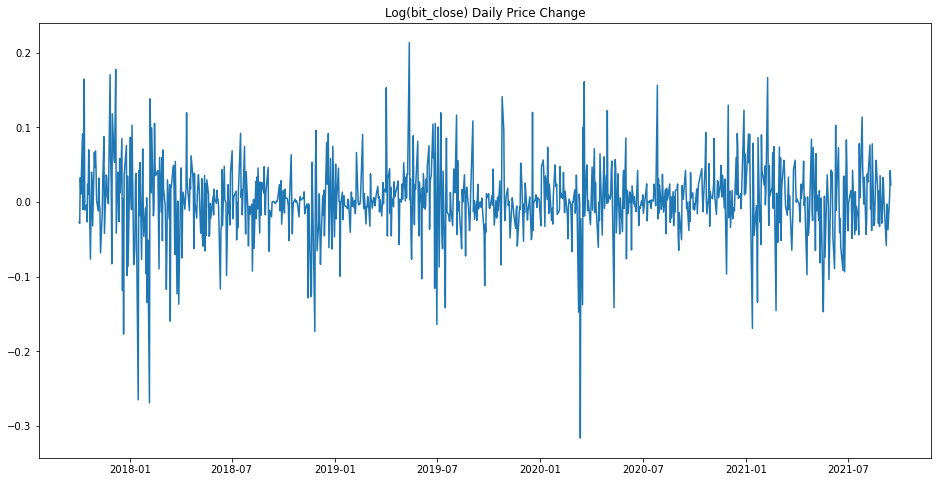

<Figure size 1152x576 with 0 Axes>

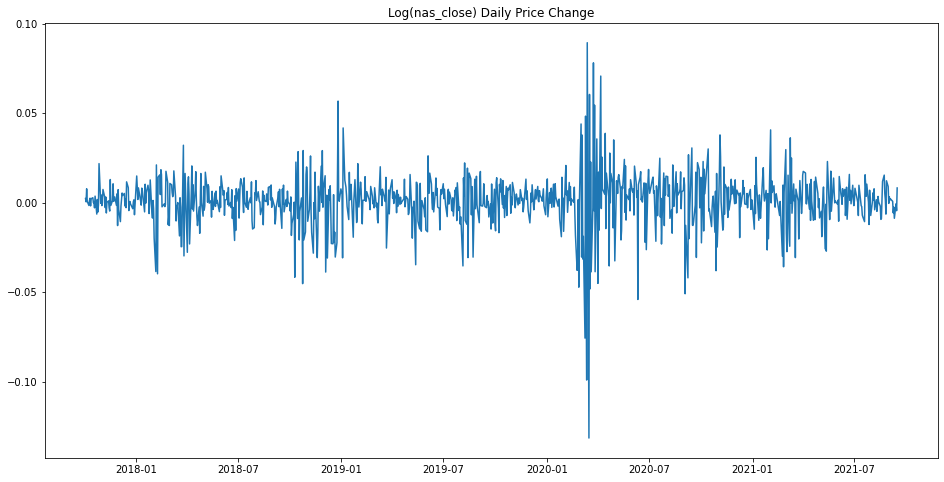

<Figure size 1152x576 with 0 Axes>

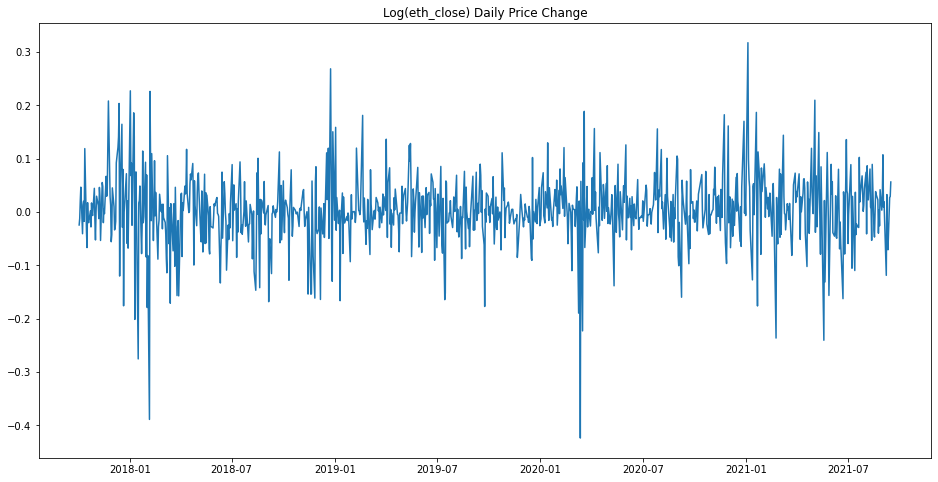

<Figure size 1152x576 with 0 Axes>

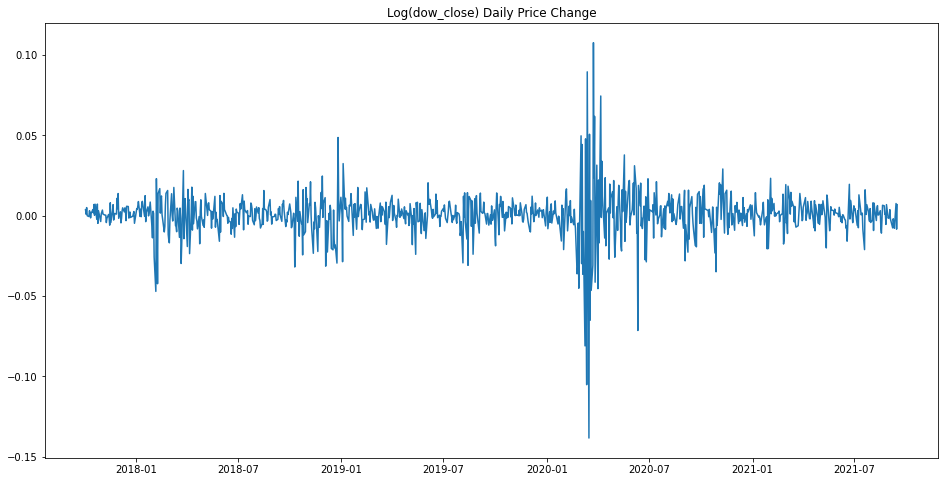

<Figure size 1152x576 with 0 Axes>

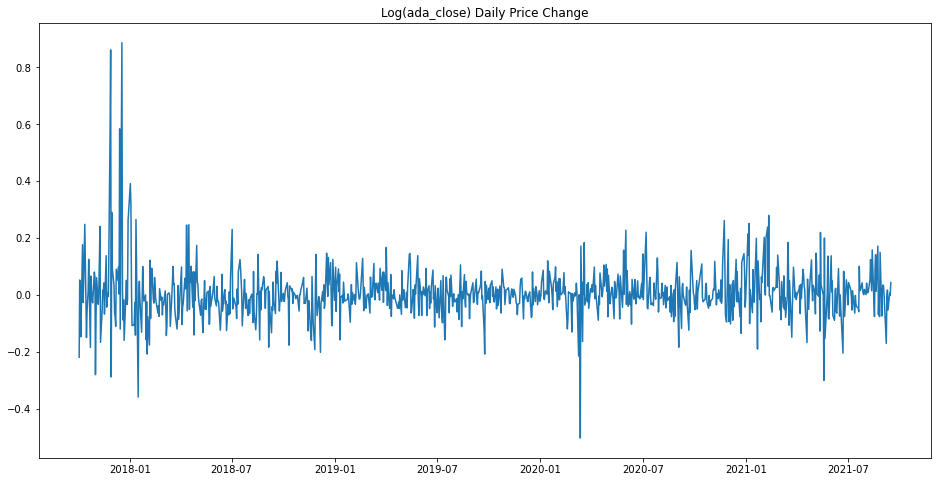

<Figure size 1152x576 with 0 Axes>

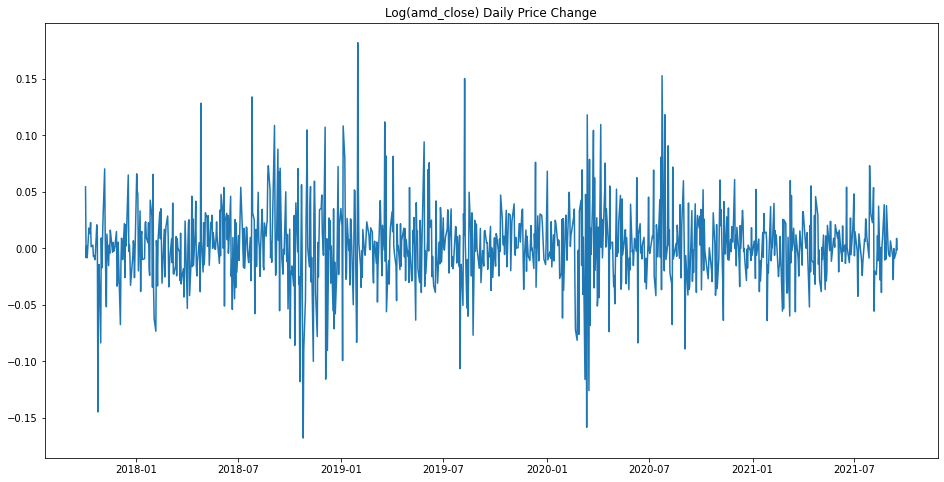

<Figure size 1152x576 with 0 Axes>

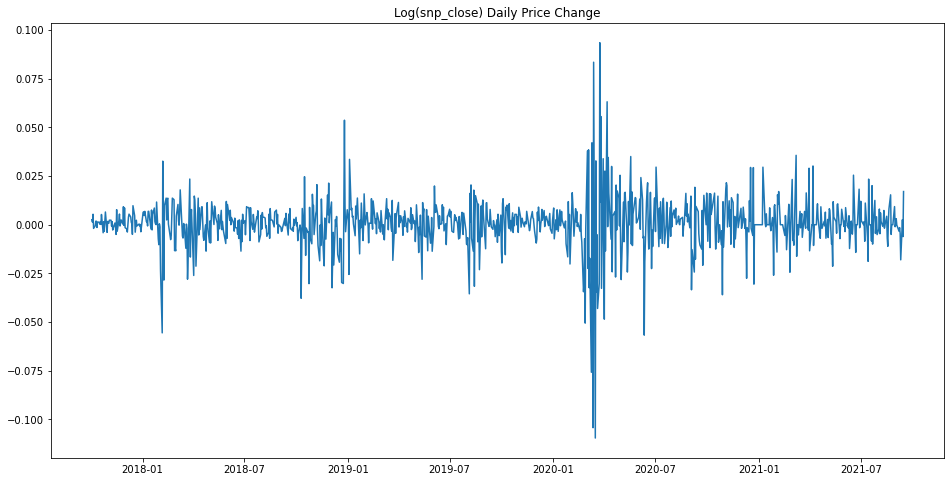

<Figure size 1152x576 with 0 Axes>

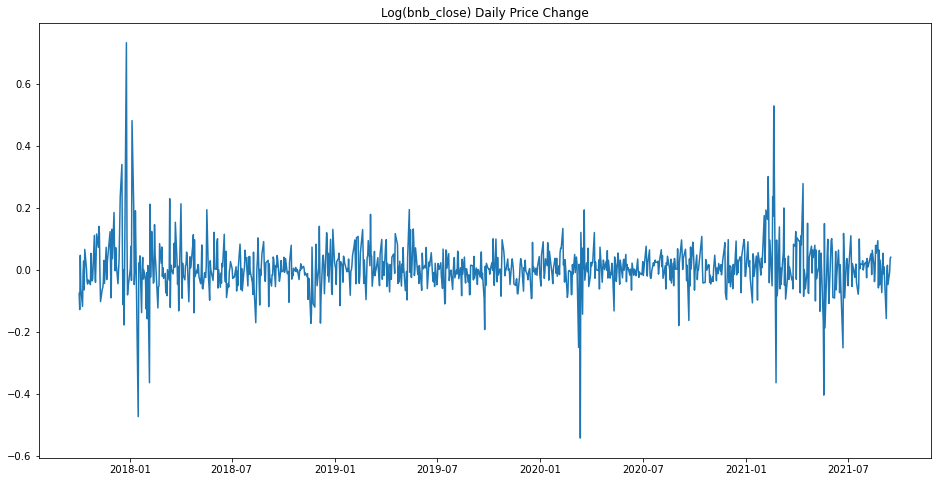

<Figure size 1152x576 with 0 Axes>

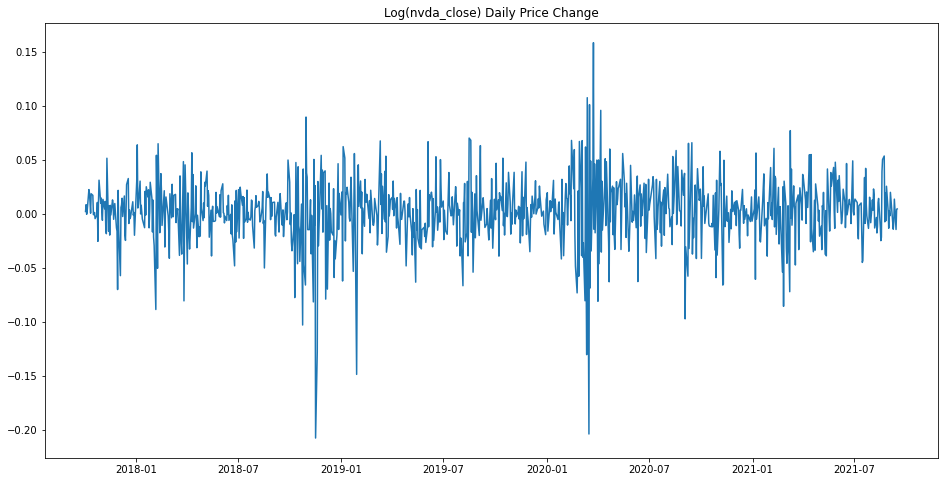

In [8]:
for column in df.columns:
    plt.figure(figsize=(16,8))
    plt.figure(figsize=(16,8))
    plt.plot(np.log(df[column]).diff(1))
    plt.title(f'Log({column}) Daily Price Change')
    plt.show()

In [9]:
for column in df.columns:
    print(column)
    print(interpret_dftest(adfuller(np.log(df[column]).diff(1).dropna())))
    print()

bit_close
Test Statistic   -1.648070e+01
p-value           2.238603e-29
dtype: float64

nas_close
Test Statistic   -1.009196e+01
p-value           1.116086e-17
dtype: float64

eth_close
Test Statistic   -1.626533e+01
p-value           3.531931e-29
dtype: float64

dow_close
Test Statistic   -9.693526e+00
p-value           1.119993e-16
dtype: float64

ada_close
Test Statistic   -5.935867e+00
p-value           2.321806e-07
dtype: float64

amd_close
Test Statistic   -6.390923e+00
p-value           2.106972e-08
dtype: float64

snp_close
Test Statistic   -9.628133e+00
p-value           1.639544e-16
dtype: float64

bnb_close
Test Statistic   -7.388609e+00
p-value           8.111878e-11
dtype: float64

nvda_close
Test Statistic   -1.176840e+01
p-value           1.104852e-21
dtype: float64



The data is in much better shape for the ARIMA models.

In [10]:
df=np.log(df).diff(1).dropna()
df.to_csv(f'../../data/train/arima_model.csv')